In [1]:
#The additional results, as collected in the readme file
gnn_data = {
    4: {
        'F1': 0.960251,
        'TN': 8861805,
        'FN': 14232,
        'FP': 355678,
        'TP': 74370
    },
    6: {
        'F1': 0.9253,
        'TN': 8528617,
        'FN': 20171,
        'FP': 674369,
        'TP': 75290
    },
    12: {
        'F1': 0.8619,
        'TN': 7913107,
        'FN': 33649,
        'FP': 1247058,
        'TP': 81919
    },
    24: {
        'F1': 0.7743,
        'TN': 7049429,
        'FN': 55720,
        'FP': 2027601,
        'TP': 98029
    },
    32: {
        'F1': 0.7613,
        'TN': 6697146,
        'FN': 69442,
        'FP': 2062921,
        'TP': 103698
    },
    64: {
        'F1': 0.6485,
        'TN': 5740491,
        'FN': 121567,
        'FP': 3071077,
        'TP': 149158
    },
    96: {
        'F1': 0.5751,
        'TN': 4848969,
        'FN': 163906,
        'FP': 3553196,
        'TP': 181700
    },
    192: {
        'F1': 0.5352,
        'TN': 4333569,
        'FN': 257107,
        'FP': 3748827,
        'TP': 278676
    },
    288: {
        'F1': 0.5273,
        'TN': 4017735,
        'FN': 318792,
        'FP': 3592977,
        'TP': 346326
    }
}
number_of_all_events = gnn_data[4]['TP'] + gnn_data[4]['FN']
number_of_all_data_points = gnn_data[4]['TN'] + gnn_data[4]['FN']

gnn_rates = {}

# Calculate TPR and FPR for each FW
for fw, metrics in gnn_data.items():
    TP = metrics['TP']
    FN = metrics['FN']
    FP = metrics['FP']
    TN = metrics['TN']

    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Avoid division by zero
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # Avoid division by zero

    gnn_rates[fw] = {'TPR': TPR, 'FPR': FPR}
gnn_rates

{4: {'TPR': 0.8393715717478161, 'FPR': 0.038587323676105505},
 6: {'TPR': 0.7886990498737705, 'FPR': 0.07327719503213413},
 12: {'TPR': 0.7088380866675896, 'FPR': 0.13613925076677114},
 24: {'TPR': 0.6375911388041549, 'FPR': 0.22337713987945396},
 32: {'TPR': 0.5989257248469446, 'FPR': 0.23549146370684151},
 64: {'TPR': 0.5509576138147567, 'FPR': 0.3485278670039203},
 96: {'TPR': 0.5257431873289237, 'FPR': 0.42289052881013406},
 192: {'TPR': 0.5201284848530096, 'FPR': 0.46382619708314216},
 288: {'TPR': 0.5206985828078626, 'FPR': 0.4720947264855115}}

In [2]:
#Percentage of faliures
faliure_percentage = number_of_all_events/number_of_all_data_points
print(faliure_percentage)
#Cost of the system
# The exact cost of the system is not publically known, so we use a very conservative estimate of 1 million euro
cost_of_system = 1
test_set_size = 0.2

0.00998215757775683


In [3]:
faliure_percentage*100

0.998215757775683

In [4]:
#General variables
hourly_pay = 1/1e5 #10 000 times less than the price of the system
unnecesary_action_duration = 1/12
cost_of_faliure = faliure_percentage*cost_of_system*test_set_size
cost_of_faliure

0.0019964315155513663

In [5]:
#Costs
#Costs associated with the mispredreictions are 1) the cost of an unnecesssary action - this is the cost of a false positive signal and
#2) the cost of a false negative

#unnecesary action cost
#we make an assumption that each FP signal takes at most 5 minute to resolve (a very conservative estimate)
#we return the Expected value of vasted time with hourly cost
#we assume the system administrator's per-hour salary is 10 000 times smaller than the price of the system
def unnecsary_action_cost(FW):
  FP_rate = gnn_rates[FW]['FPR']
  return FP_rate*unnecesary_action_duration*hourly_pay*980

In [6]:
def normalize_dict_keys(data):
    keys = list(data.keys())
    min_key = min(keys)
    max_key = max(keys)
    normalized_data = {(key - min_key) / (max_key - min_key): value for key, value in data.items()}
    return normalized_data

In [7]:
#Benefits
#Benefit = probability_to_prevent_faliure(fw) * cost_of_faliure * true_positive_rate(fw)

#Probability to prevent faliure
FWs = [4,6,12,24,32, 64, 96, 192, 288]

#Assumpitons of the function
#Longer future windows result in higher probability to prevent faliure
FW_p_1 = {
    0:0,
    4: 0.7,
    12: 0.8,
    32: 0.8,
    288 : 0.8}

max_1 = max(list(FW_p_1.keys()))
FW_p_2 = {
    0:0,
    4: 0.3,
    12: 0.6,
    32: 0.8,
    288: 0.8}
#depends on the SLA agreements
#You are still getting the benefit as you have alerted the people responsible in time
max_2 = max(list(FW_p_2.keys()))


FW_p_3 = {
    0:0,
    4: 0,
    12: 0,
    24: 0.3,
    32: 0.8,
    288: 0.8}
max_3 = max(list(FW_p_3.keys()))
FW_p_1 = {'points': normalize_dict_keys(FW_p_1), 'max' : max_1}
FW_p_2 = {'points': normalize_dict_keys(FW_p_2), 'max' : max_2}
FW_p_3 = {'points': normalize_dict_keys(FW_p_3), 'max' : max_3}

In [8]:
for FW in FWs:
  print(unnecsary_action_cost(FW))

3.151298100215283e-05
5.98430426095762e-05
0.00011118038812619643
0.0001824246642348874
0.00019231802869392056
0.0002846310913865349
0.00034536059852827616
0.0003787913942845661
0.0003855440266298344


In [9]:
def generate_prob_kernel(fw_dict):
  points = fw_dict['points']
  max_value = fw_dict['max']
  given_function = generate_strict_monotonic_pchip(points)
  def limited_function(x):
    xx = x/max_value
    if xx <= 1:
        return given_function(xx)
    else:
        return given_function(1) #normalized inputs
  return limited_function

In [10]:
def benefit(FW, fw_dict = FW_p_1):
  prob_to_prevent = generate_prob_kernel(fw_dict)(FW)
  TP_rate = gnn_rates[FW]['TPR']
  return generate_prob_kernel(fw_dict)(FW)*TP_rate*cost_of_faliure

In [11]:
def cost_benefit(FW, fw_dict = FW_p_1):
  ben = benefit(FW, fw_dict)
  cost = unnecsary_action_cost(FW)
  return 100*(ben - cost)

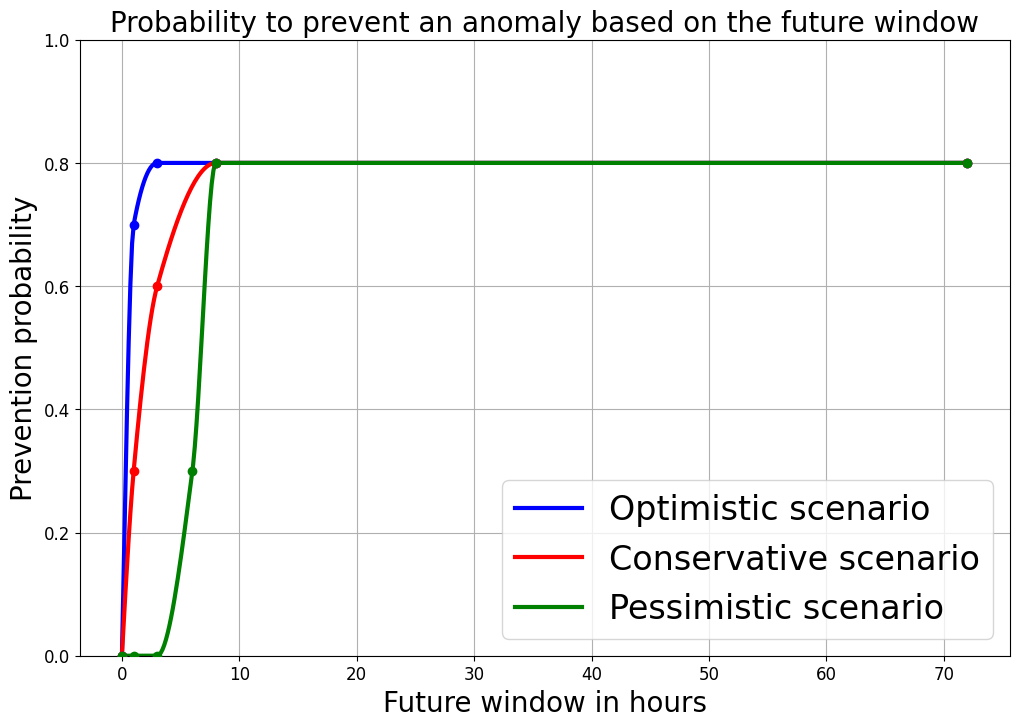

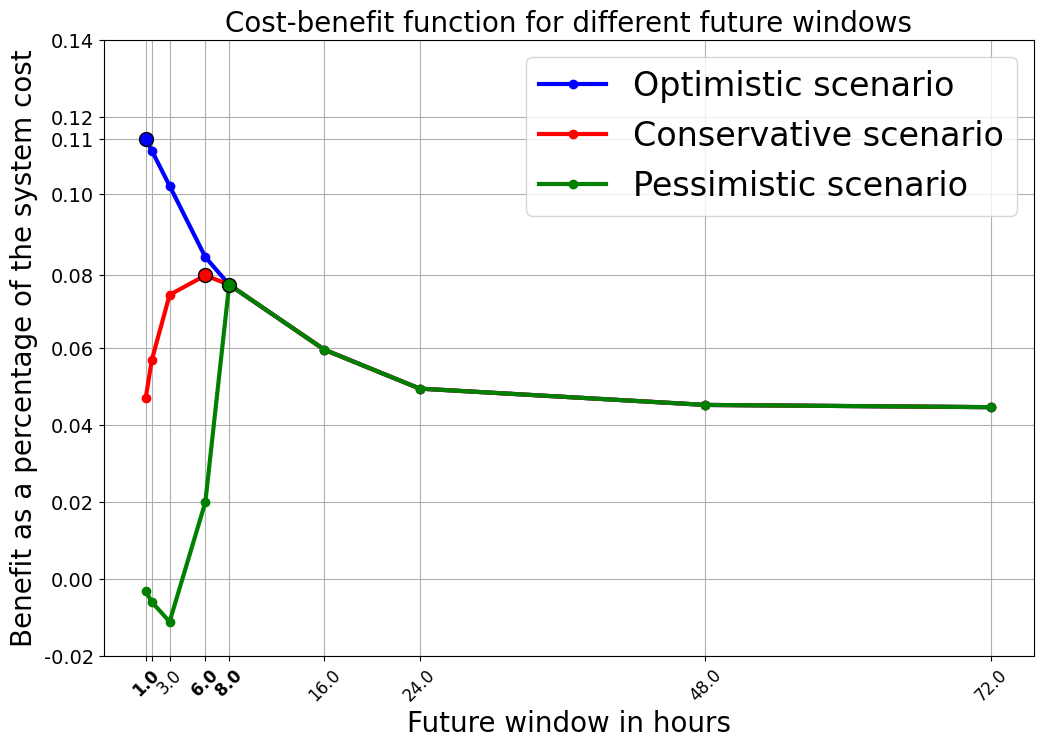

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module for formatting
import numpy as np
from scipy.interpolate import PchipInterpolator

line_width = 3

def generate_strict_monotonic_pchip(data):
    sorted_items = sorted(data.items())
    x_vals, y_vals = zip(*sorted_items)
    x_min = min(x_vals)
    x_max = max(x_vals)
    normalized_x_vals = [(x - x_min) / (x_max - x_min) for x in x_vals]
    pchip = PchipInterpolator(normalized_x_vals, y_vals)
    return lambda x: pchip((x - x_min) / (x_max - x_min) if x_min != x_max else 0)

# Define kernels for FW_p_1, FW_p_2, FW_p_3 from their 'points' dictionaries
monotonic_function = generate_strict_monotonic_pchip(FW_p_1['points'])
monotonic_function2 = generate_strict_monotonic_pchip(FW_p_2['points'])
monotonic_function3 = generate_strict_monotonic_pchip(FW_p_3['points'])

# Create x values for plotting that are properly scaled
x_plot = np.linspace(0, 1, 500)
x_hours = [(x * (max(FW_p_1['points'].keys()) - min(FW_p_1['points'].keys())) + min(FW_p_1['points'].keys())) * 72 for x in x_plot]

# Generate y values using the monotonic functions
y_plot = [monotonic_function(x) for x in x_plot]
y_plot2 = [monotonic_function2(x) for x in x_plot]
y_plot3 = [monotonic_function3(x) for x in x_plot]

plt.figure(figsize=(12, 8))
plt.ylim(0, 1)
plt.plot(x_hours, y_plot, label='Optimistic scenario', color='blue', linewidth=line_width)
plt.plot(x_hours, y_plot2, label='Conservative scenario', color='red', linewidth=line_width)
plt.plot(x_hours, y_plot3, label='Pessimistic scenario', color='green', linewidth=line_width)

# Scatter plot to show original data points, scaled to hours
plt.scatter([k * 72 for k in FW_p_1['points'].keys()], FW_p_1['points'].values(), color='blue', zorder=5)
plt.scatter([k * 72 for k in FW_p_2['points'].keys()], FW_p_2['points'].values(), color='red', zorder=5)
plt.scatter([k * 72 for k in FW_p_3['points'].keys()], FW_p_3['points'].values(), color='green', zorder=5)

plt.title('Probability to prevent an anomaly based on the future window', fontsize=20)
plt.xlabel('Future window in hours', fontsize=20)
plt.ylabel('Prevention probability', fontsize=20)
plt.legend(prop={'size': 24})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

fw_keys = list(gnn_data.keys())
hours = [fw / 4 for fw in fw_keys]  # Convert FW values to hours

plt.figure(figsize=(12, 8))  # Increased figure size for better label spacing
kernels = [FW_p_1, FW_p_2, FW_p_3]
kernel_labels = ['Optimistic scenario', 'Conservative scenario', 'Pessimistic scenario']
colors = ['blue', 'red', 'green']
max_hours = []  # To store hours corresponding to max values
max_values = []  # To store max y-values for each kernel

for kernel, label, color in zip(kernels, kernel_labels, colors):
    cost_benefit_values_fw_keys = [cost_benefit(fw, kernel) for fw in fw_keys]
    max_value = max(cost_benefit_values_fw_keys)
    max_values.append(max_value)  # Store max y-values for later highlighting
    max_index = cost_benefit_values_fw_keys.index(max_value)
    max_hour = hours[max_index]
    max_hours.append(max_hour)  # Store max hour for later highlighting

    # Plot the line with increased linewidth
    plt.plot(hours, cost_benefit_values_fw_keys, marker='o', linestyle='-', color=color, label=label, linewidth=line_width)
    # Highlight the max point
    plt.scatter([max_hour], [max_value], color=color, s=100, edgecolor='black', zorder=5)

plt.title('Cost-benefit function for different future windows', fontsize=20)
plt.xlabel('Future window in hours', fontsize=20)
plt.ylabel('Benefit as a percentage of the system cost', fontsize=20)

# Prepare labels
formatted_labels = [f"{hour:.1f}" for hour in hours]
formatted_labels[1] = ''  # Removing the second label

# Rotate labels and set them
plt.xticks(hours, labels=formatted_labels, rotation=45, fontsize=12)

# Setting custom y-ticks to highlight max values
y_ticks = list(set(plt.gca().get_yticks().tolist() + max_values))  # Add max values and remove duplicates

# Formatting y-tick labels to 2 decimal places
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.yticks(fontsize=14)

if len(y_ticks) >= 3:
    sorted_y_ticks = sorted(y_ticks)
    removed_label = sorted_y_ticks.pop(-5)
    removed_label = sorted_y_ticks.pop(-6)
    plt.yticks(sorted_y_ticks, fontsize=14)

# Highlight max hours on the x-axis
ax = plt.gca()  # Get current axis
x_labels = ax.get_xticklabels()
for label in x_labels:
    label_text = label.get_text()
    if label_text:  # Ensure the label text is not empty before converting
        if float(label_text) in max_hours:
            label.set_fontweight('bold')

# Highlight max values on the y-axis
y_labels = ax.get_yticklabels()
for label in y_labels:
    try:
        if float(label.get_text()) in max_values:
            label.set_fontweight('bold')
    except ValueError:
        continue  # Ignore non-numeric labels

plt.grid(True)
plt.legend(prop={'size': 24})  # Increase the legend font size
plt.show()


In [13]:
results = {}
for kernel, label, color in zip(kernels, kernel_labels, colors):
    results[label] = [cost_benefit(fw, kernel) for fw in fw_keys]